# Creating a linear regression model that predicts rent based on living space.

## First step is to import all the libraries.
### That include pandas, numpy, matplotlib with pyplot, 
### Scikit-learn libraries:
### Data processing: StandardScaler and train_test_split, 
### Model and hyperparamter tuning:LinearRegression GridSearchCV, Ridge, Lasso, Elastic Net  and Pipeline
### Result analysis :mean_absolute_error, mean_squared_error, and r2_score

In [11]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline

### Importing data from csv file https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany

In [12]:
df = pd.read_csv('immo_data.csv')
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [13]:
print(df.describe())

       serviceCharge  telekomHybridUploadSpeed   picturecount     pricetrend  \
count  261941.000000                   45020.0  268850.000000  267018.000000   
mean      151.206113                      10.0       9.791958       3.389001   
std       308.295790                       0.0       6.408399       1.964874   
min         0.000000                      10.0       0.000000     -12.330000   
25%        95.000000                      10.0       6.000000       2.000000   
50%       135.000000                      10.0       9.000000       3.390000   
75%       190.000000                      10.0      13.000000       4.570000   
max    146118.000000                      10.0     121.000000      14.920000   

       telekomUploadSpeed     totalRent  yearConstructed       scoutId  \
count       235492.000000  2.283330e+05    211805.000000  2.688500e+05   
mean            28.804928  9.013315e+02      1966.400590  1.069697e+08   
std             16.337151  3.323833e+04        46.992207 

## Data preprocessing.
### Removing all the Nan values.

In [14]:
df1=df[['livingSpace', 'totalRent']].copy()

In [15]:
df1.isna().sum()

livingSpace        0
totalRent      40517
dtype: int64

In [16]:
df1=df1.dropna(how='any')
df1.isna().sum()

livingSpace    0
totalRent      0
dtype: int64

### Living space of less than 10 sq meter area and monthly rent of less than 100 Euros seems illogical.

In [17]:
df1 = df1[df1['totalRent'] > 100]
df1 = df1[df1['livingSpace'] > 10]

In [18]:
df1.describe()

,livingSpace,totalRent
count,227891.000000,2.278910e+05
mean,73.729388,8.983163e+02
std,274.015689,3.320464e+04
min,10.100000,1.050000e+02
25%,54.000000,4.700000e+02
50%,67.000000,6.500000e+02
75%,86.000000,9.850000e+02
max,111111.000000,1.575154e+07


In [19]:
# divide the data into feature and target sets.
X = df1['livingSpace'].values
y = df1['totalRent'].values



In [20]:

pearson_corr, p_value = stats.pearsonr(X, y)

print("Pearson correlation coefficient:", pearson_corr)
print("P-value:", p_value)

Pearson correlation coefficient: 0.0018636138699856895
P-value: 0.3736556837833715


### Pearson correlation coefficient of 0.001 suggestes there is no liner relation between X and y.
### p Value is 0.3 so it proves sginifes the null hypothese and says it y is not statistically significant to X.

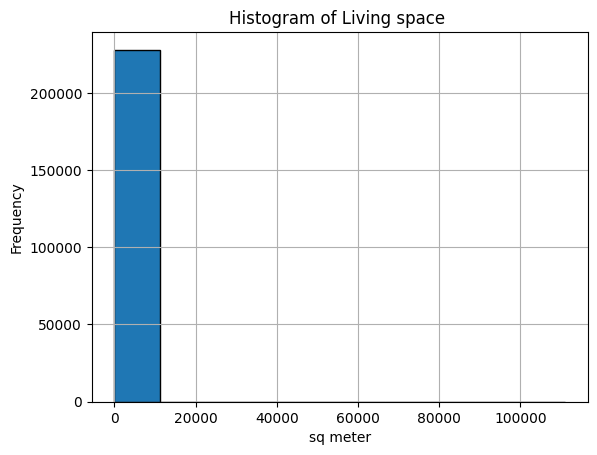

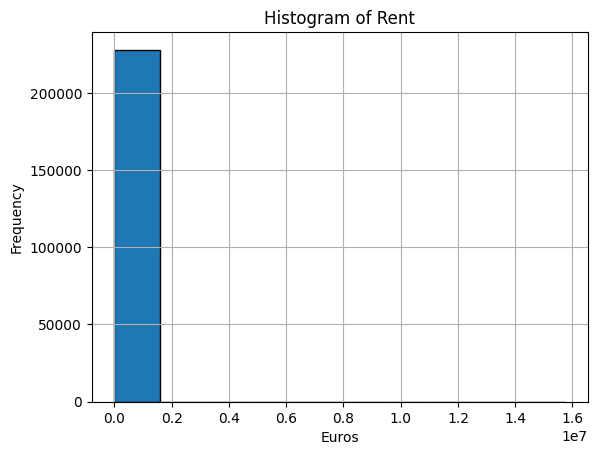

In [21]:
plt.hist(X, bins=10, edgecolor='black')  
plt.title('Histogram of Living space ')
plt.xlabel('sq meter')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()

plt.hist(y, bins=10, edgecolor='black')  
plt.title('Histogram of Rent')
plt.xlabel('Euros')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()

In [22]:
X=X.reshape(-1, 1)
X_log=np.log(X)
y_log=np.log(y)


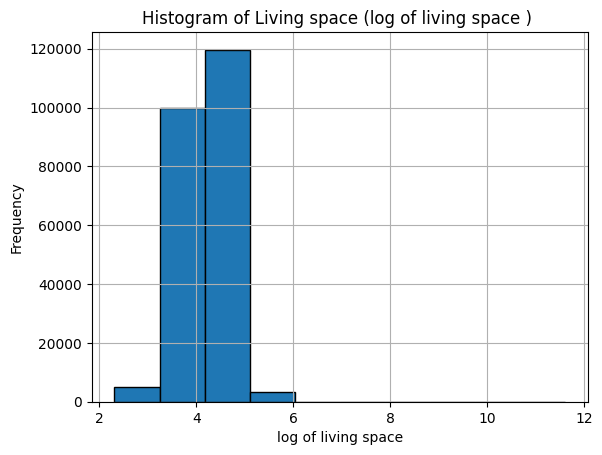

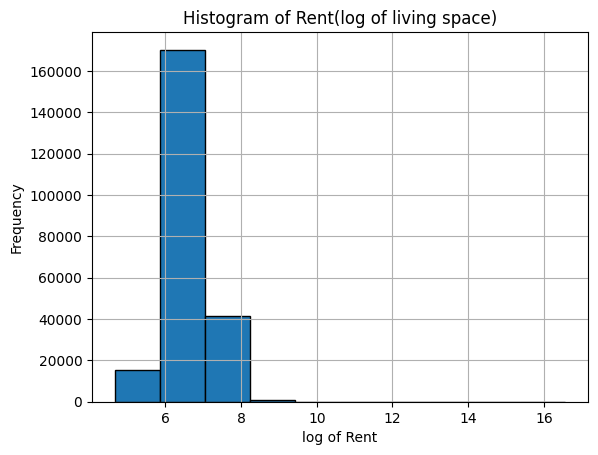

In [23]:
plt.hist(X_log, bins=10, edgecolor='black')  
plt.title('Histogram of Living space (log of living space ) ')
plt.xlabel('log of living space')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()

plt.hist(y_log, bins=10, edgecolor='black') 
plt.title('Histogram of Rent(log of living space)')
plt.xlabel('log of Rent')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()

### log values were more negetivily skwed then orginal.
#### so two models were creted to see the significance of log values.

Mean Absolute Error (MAE): 412.73253714607176
Root Mean Squared Error (RMSE): 806.207732213275
R-squared: -0.006666588446533339


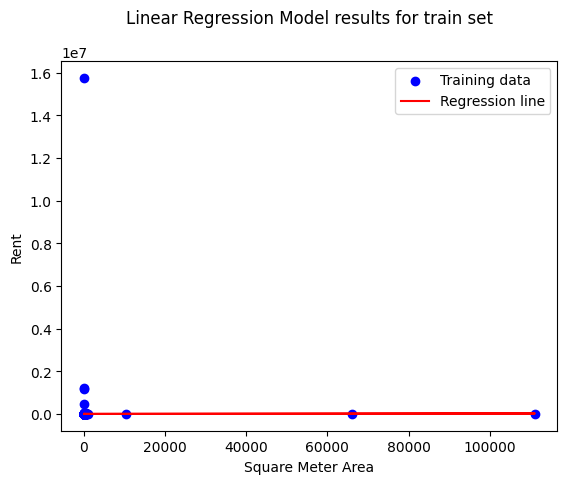

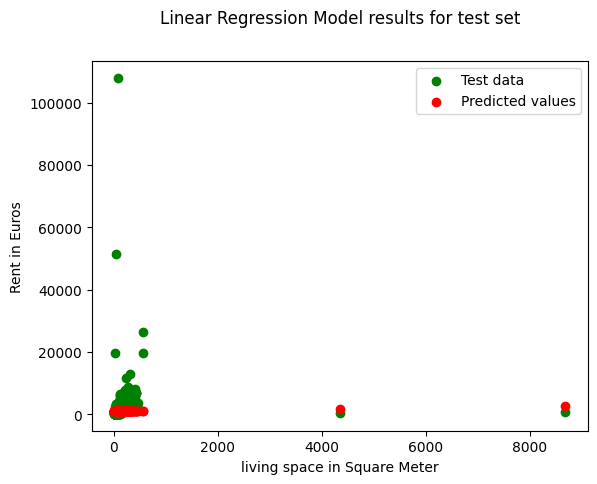

In [24]:
# Divide the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_orignal = LinearRegression()
model_orignal.fit(X_train, y_train)
y_pred= model_orignal.predict(X_test)
# parmaters to predict 
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')
#ploting the graph between feature and target set between actual train target data and predicted  train target data 
y_train_pred=model_orignal.predict(X_train)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='red', label='Regression line')
plt.title('Linear Regression Model results for train set', y=1.08)
plt.xlabel('Square Meter Area')
plt.ylabel('Rent')
plt.legend()
plt.show()
#ploting the graph between feature and target set between actual test target data and predicted test target data 
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.title('Linear Regression Model results for test set', y=1.08)
plt.xlabel('living space in Square Meter')
plt.ylabel('Rent in Euros')
plt.legend()
plt.show()



#*********************************************************


Mean Absolute Error with log values (MAE): 0.29160408159666806
Root Mean Squared Error with log values (RMSE): 0.3704496060904448
R-squared: 0.5205156337331357


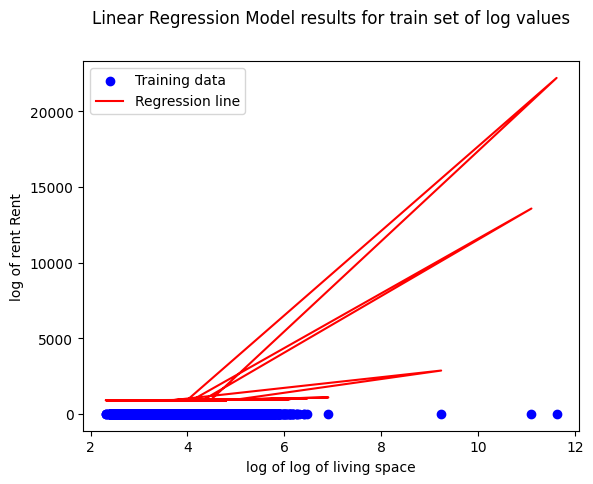

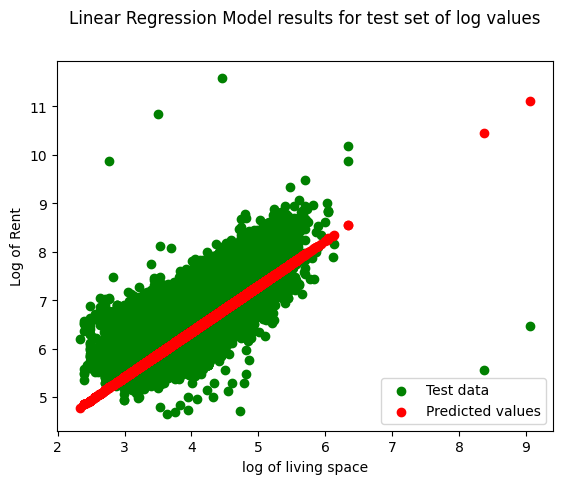

In [25]:



X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2 = r2_score(y_test, y_pred_log)
print(f'Mean Absolute Error with log values (MAE): {mae}')
print(f'Root Mean Squared Error with log values (RMSE): {rmse}')
print(f'R-squared: {r2}')

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='red', label='Regression line')
plt.title('Linear Regression Model results for train set of log values', y=1.08)
plt.xlabel('log of log of living space')
plt.ylabel('log of rent Rent')
plt.legend()
plt.show()
#ploting the graph between feature and target set between actual test target data and predicted test target data 
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.scatter(X_test, y_pred_log, color='red', label='Predicted values')
plt.title('Linear Regression Model results for test set of log values', y=1.08)
plt.xlabel('log of living space')
plt.ylabel('Log of Rent')
plt.legend()
plt.show()



C:\Users\Abhishek\AppData\Local\Temp\ipykernel_10060\986691257.py:2: RuntimeWarning: overflow encountered in exp
  y_train_pred_exp=np.exp(y_train_pred)


Mean Absolute Error (MAE) with exponential of log values: 245.5631702290067
Root Mean Squared Error with exponential of log values (RMSE): 781.5109289826115
R-squared: 0.054063795547870885


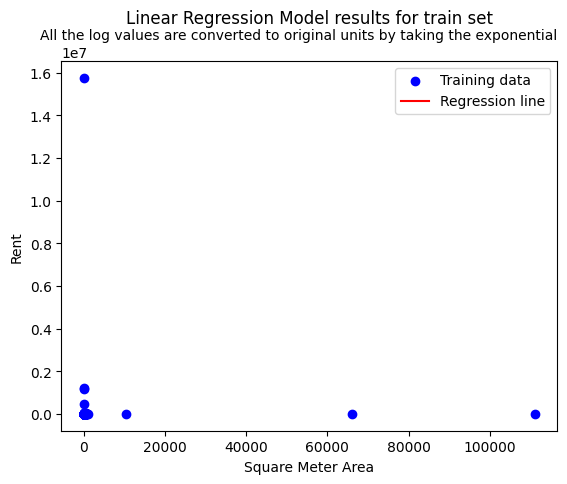

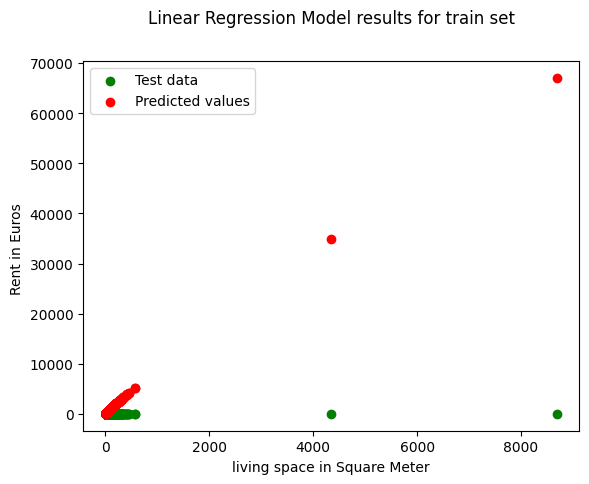

In [26]:
# Getting results orignal units(Euro)
y_train_pred_exp=np.exp(y_train_pred)
y_pred_exp= np.exp(y_pred_log)
X_train_exp=np.exp(X_train)
X_test_exp=np.exp(X_test)
y_train_exp=np.exp(y_train)
y_test_exp=np.exp(y_test)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_exp, y_pred_exp)
print(f'Mean Absolute Error (MAE) with exponential of log values: {mae}')
print(f'Root Mean Squared Error with exponential of log values (RMSE): {rmse}')
print(f'R-squared: {r2}')
#ploting the graph between feature and target set between actual train target data and predicted  train target data 
plt.scatter(X_train_exp, y_train_exp, color='blue', label='Training data')
plt.plot(X_train_exp, y_train_pred_exp, color='red', label='Regression line')
plt.title('Linear Regression Model results for train set', y=1.08)
plt.text(1,1.07, 'All the log values are converted to original units by taking the exponential', horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel('Square Meter Area')
plt.ylabel('Rent')
plt.legend()
plt.show()
#ploting the graph between feature and target set between actual test target data and predicted test target data 
plt.scatter(X_test_exp, y_test, color='green', label='Test data')
plt.scatter(X_test_exp, y_pred_exp, color='red', label='Predicted values')
plt.title('Linear Regression Model results for train set', y=1.08)
plt.xlabel('living space in Square Meter')
plt.ylabel('Rent in Euros ')
plt.legend()
plt.show()

### Results don't make any sense
### Mean absolute error is approximately 413 which is way off than it should be. Log of data set took it to 245.
### Root mean square error is approximately 806, meaning outliers play a significant role in poor results. Even after takin log it only took it to 781.

## Removing all the outliers. 
###  Using the Inter Quantile Range(IQR)

In [27]:
Q1 = df1[['livingSpace', 'totalRent']].quantile(0.25)
Q3 = df1[['livingSpace', 'totalRent']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q3)
print(Q1)

livingSpace     32.0
totalRent      515.0
dtype: float64
livingSpace     86.0
totalRent      985.0
Name: 0.75, dtype: float64
livingSpace     54.0
totalRent      470.0
Name: 0.25, dtype: float64


In [28]:
data_IQR = df1[~((df1[['livingSpace', 'totalRent']] < (Q1 - 1.5 * IQR)) | (df1[['livingSpace', 'totalRent']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
data_IQR.describe()

,livingSpace,totalRent
count,211301.000000,211301.000000
mean,67.491991,709.194329
std,22.824593,332.226983
min,10.100000,105.000000
25%,52.430000,459.000000
50%,65.000000,615.000000
75%,80.900000,894.000000
max,134.000000,1757.500000


In [30]:
X = data_IQR['livingSpace'].values
y = data_IQR['totalRent'].values

pearson_corr, p_value = stats.pearsonr(X, y)

print("Pearson correlation coefficient:", pearson_corr)
print("P-value:", p_value)

Pearson correlation coefficient: 0.6713749103587583
P-value: 0.0


### Pearson correlation coefficient of 0.67 suggestes there is liner relation between X and y.
### p Value is 0 so it proves sginifes the null hypothese and says it y is statistically significant to X.

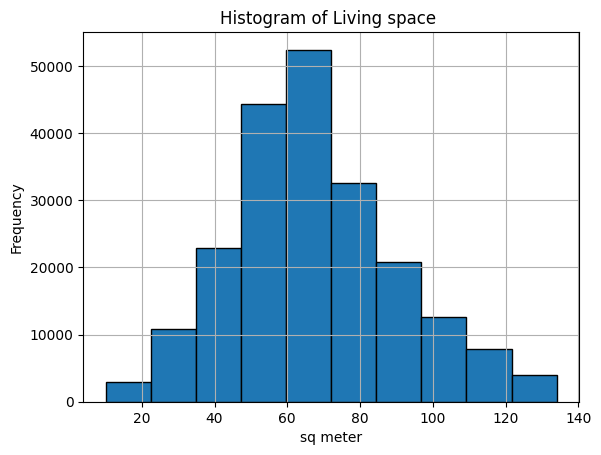

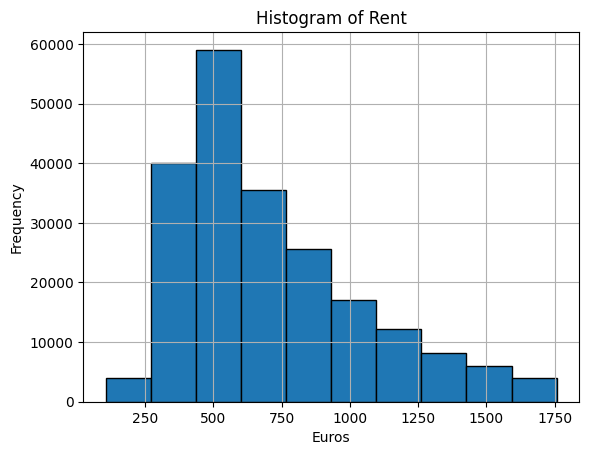

In [31]:
plt.hist(X, bins=10, edgecolor='black')   
plt.title('Histogram of Living space ')
plt.xlabel('sq meter')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()

plt.hist(y, bins=10, edgecolor='black')  
plt.title('Histogram of Rent')
plt.xlabel('Euros')
plt.ylabel('Frequency')
plt.grid(True)  #
plt.show()

### The histogram of rent shows positive skewness, to fix that log, box cox, sqrt, and cube root transformation was applied.

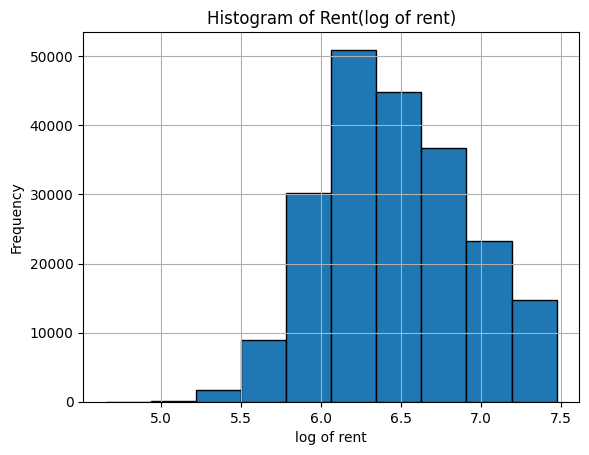

In [32]:


y_log=np.log(y)


plt.hist(y_log, bins=10, edgecolor='black')  
plt.title('Histogram of Rent(log of rent)')
plt.xlabel('log of rent')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()


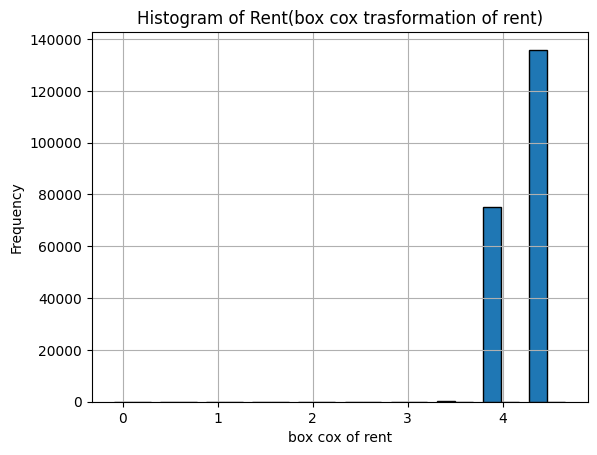

In [33]:
from scipy.stats import boxcox

y_bcx=boxcox(y)



plt.hist(y_bcx, bins=10, edgecolor='black')  
plt.title('Histogram of Rent(box cox trasformation of rent)')
plt.xlabel('box cox of rent')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()


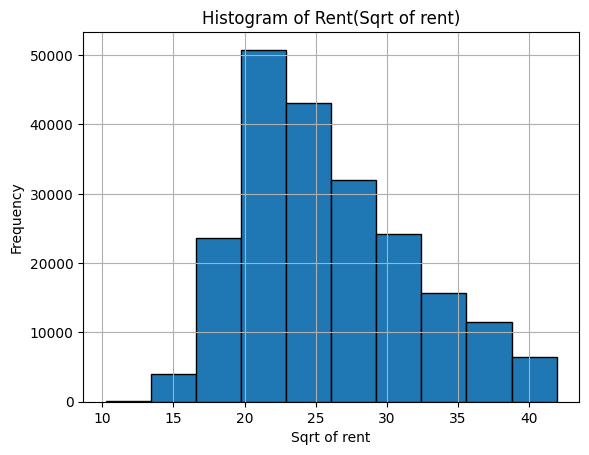

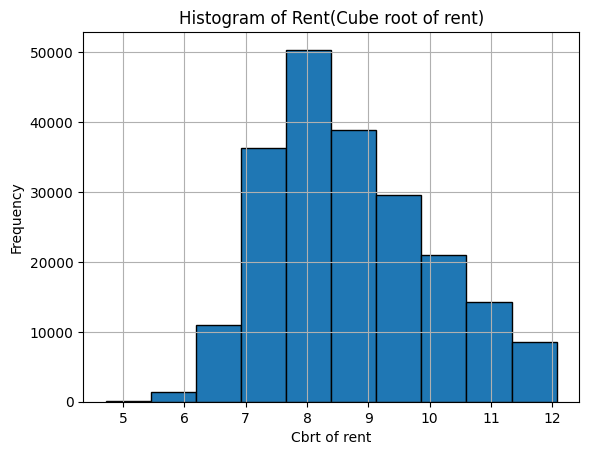

In [34]:

y_sqrt=(np.sqrt(y))



plt.hist(y_sqrt, bins=10, edgecolor='black')  
plt.title('Histogram of Rent(Sqrt of rent)')
plt.xlabel('Sqrt of rent')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()
y_cbrt=np.cbrt(y)



plt.hist(y_cbrt, bins=10, edgecolor='black') 
plt.title('Histogram of Rent(Cube root of rent)')
plt.xlabel('Cbrt of rent')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()

### Cube root traformation showed best normal ditribution.

### First, prediction without transformed data was done. Then with cube root transformed target data was used to train the model.


Mean Absolute Error (MAE): 188.64270517410625
Root Mean Squared Error (RMSE): 245.96347609360564
R-squared: 0.45306491107222124


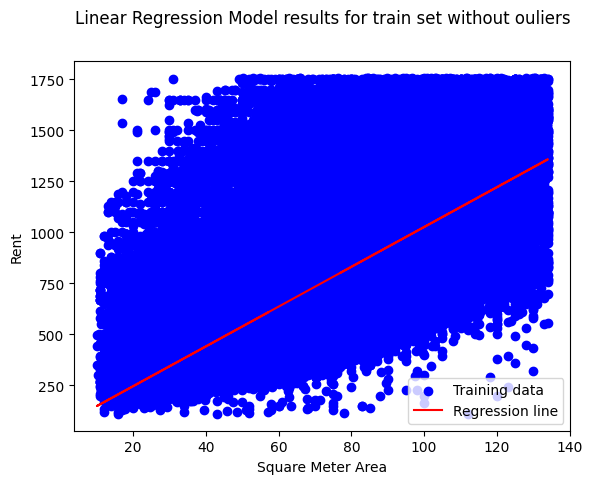

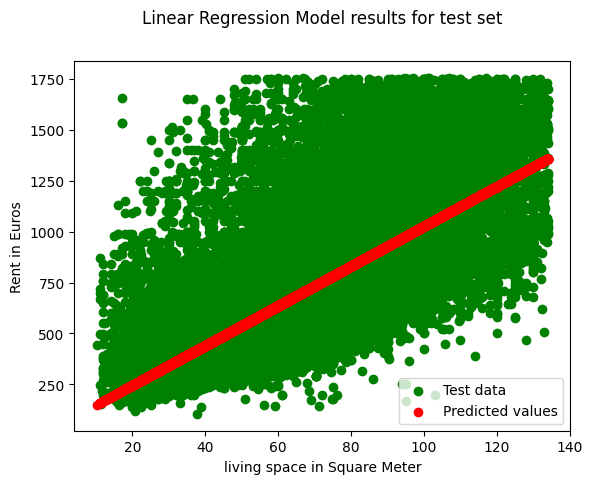

In [35]:
X=X.reshape(-1, 1)

# divide the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_without_cbrt = LinearRegression()
model_without_cbrt.fit(X_train, y_train)
y_pred= model_without_cbrt.predict(X_test)
# parmaters to predict 
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')
#ploting the graph between feature and target set between actual train target data and predicted  train target data 
y_train_pred=model_without_cbrt.predict(X_train)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='red', label='Regression line')
plt.title('Linear Regression Model results for train set without ouliers', y=1.08)
plt.xlabel('Square Meter Area')
plt.ylabel('Rent')
plt.legend()
plt.show()
#ploting the graph between feature and target set between actual test target data and predicted test target data 
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.title('Linear Regression Model results for test set', y=1.08)
plt.xlabel('living space in Square Meter')
plt.ylabel('Rent in Euros')
plt.legend()
plt.show()



#*********************************************************


Mean Absolute Error for log predction (MAE): 0.755907030009067
Root Mean Squared Error  log predction (RMSE): 0.9515431364865172
R-squared: 0.48240748146798584


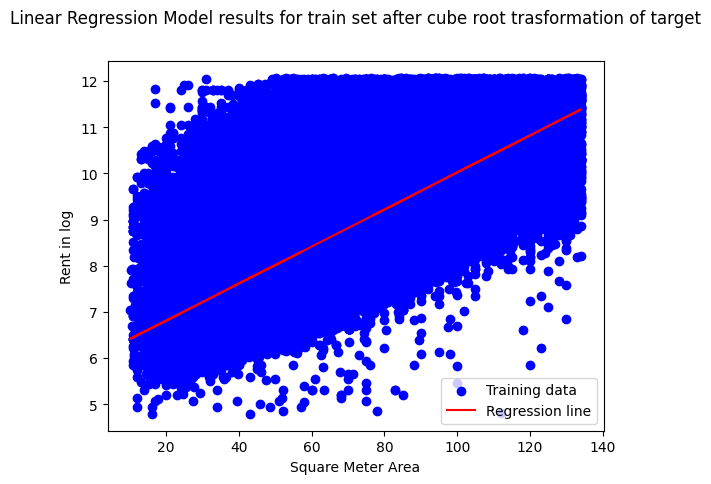

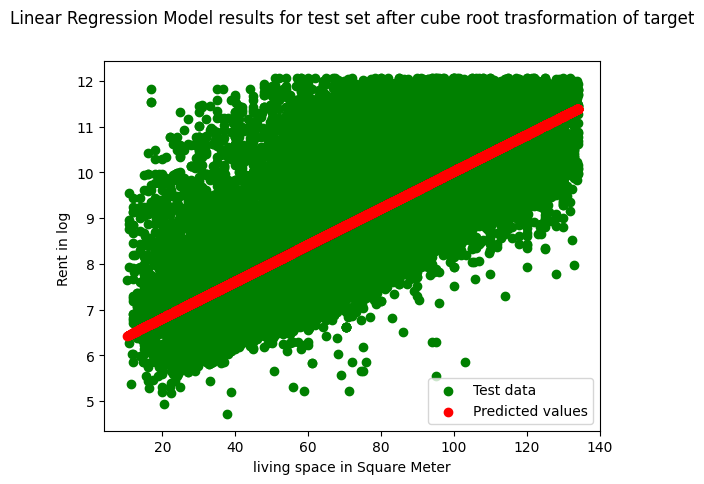

In [36]:

# divide the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y_cbrt, test_size=0.2, random_state=42)
model_cbrt = LinearRegression()
model_cbrt.fit(X_train, y_train)
y_pred_cbrt= model_cbrt.predict(X_test)
# parmaters to predict 
mae = mean_absolute_error(y_test, y_pred_cbrt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cbrt))
r2 = r2_score(y_test, y_pred_cbrt)
print(f'Mean Absolute Error for log predction (MAE): {mae}')
print(f'Root Mean Squared Error  log predction (RMSE): {rmse}')
print(f'R-squared: {r2}')
#ploting the graph between feature and target set between actual train target data and predicted  train target data 
y_train_pred=model_cbrt.predict(X_train)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='red', label='Regression line')
plt.title('Linear Regression Model results for train set after cube root trasformation of target', y=1.08)
plt.xlabel('Square Meter Area')
plt.ylabel('Rent in log')
plt.legend()
plt.show()
#ploting the graph between feature and target set between actual test target data and predicted test target data 
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.scatter(X_test, y_pred_cbrt, color='red', label='Predicted values')
plt.title('Linear Regression Model results for test set after cube root trasformation of target', y=1.08)
plt.xlabel('living space in Square Meter')
plt.ylabel('Rent in log ')
plt.legend()
plt.show()


Mean Absolute Error (MAE): 180.9470426019593
Root Mean Squared Error (RMSE): 245.08978391289443
R-squared: 0.45694356998777763


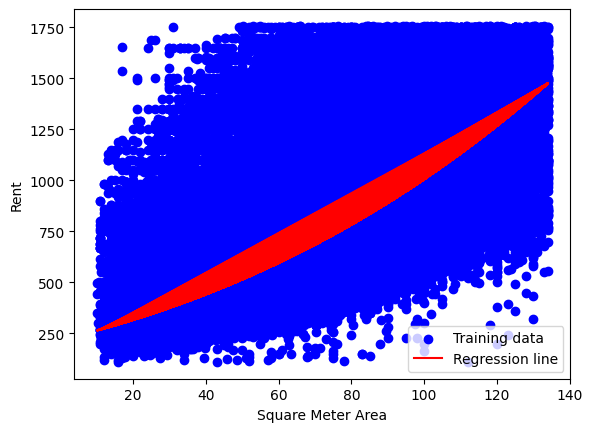

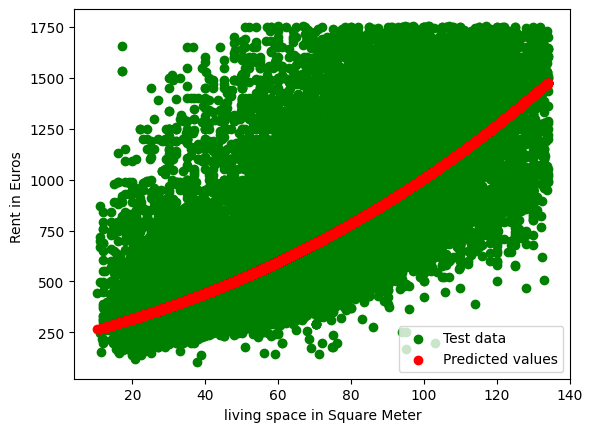

In [37]:
# Getting results orignal units(Euro)
y_pred_cube=np.power(y_pred_cbrt, 3)
y_train_pred_cube= np.power(y_train_pred,3)
y_train_cube=np.power(y_train,3)
y_test_cube=np.power(y_test,3)
mae = mean_absolute_error(y_test_cube, y_pred_cube)
rmse = np.sqrt(mean_squared_error(y_test_cube, y_pred_cube))
r2 = r2_score(y_test_cube, y_pred_cube)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')
#ploting the graph between feature and target set between actual train target data and predicted  train target data 
plt.scatter(X_train, y_train_cube, color='blue', label='Training data')
plt.plot(X_train, y_train_pred_cube, color='red', label='Regression line')
plt.xlabel('Square Meter Area')
plt.ylabel('Rent')
plt.legend()
plt.show()
#ploting the graph between feature and target set between actual test target data and predicted test target data 
plt.scatter(X_test, y_test_cube, color='green', label='Test data')
plt.scatter(X_test, y_pred_cube, color='red', label='Predicted values')
plt.xlabel('living space in Square Meter')
plt.ylabel('Rent in Euros ')
plt.legend()
plt.show()

### Results are better than what we got before.
### After removing outliers model had a Mean Absolute error of approximately 188 and a Root Mean Squared Error of approximately 245.
### The Mean Absolute Error (MAE) with the cube root transformation is approximately 180 euros, which indicates a significant improvement. This means that, on average, the model's predictions are off by 180 euros compared to the actual prices posted in the ads.
### Root Mean Squared Error remained the same approximately 245.

## Hypertuning of model.

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y_cbrt, test_size=0.2, random_state=42)

In [39]:
pipeline = Pipeline([
    
    ('regressor', LinearRegression())
])

param_grid = [
    {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1.0, 10.0]
    },
    {
        'regressor': [Lasso()],
        'regressor__alpha': [0.1, 1.0, 10.0]
    },
    {
        'regressor': [ElasticNet()],
        'regressor__alpha': [0.1, 1.0, 10.0],
        'regressor__l1_ratio': [0.1, 0.5, 0.9]
    }
]
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'regressor': Ridge(), 'regressor__alpha': 10.0}


Mean Absolute Error for log predction (MAE): 0.7559070382788775
Root Mean Squared Error  log predction (RMSE): 0.9515431368812278
R-squared: 0.48240748103857967


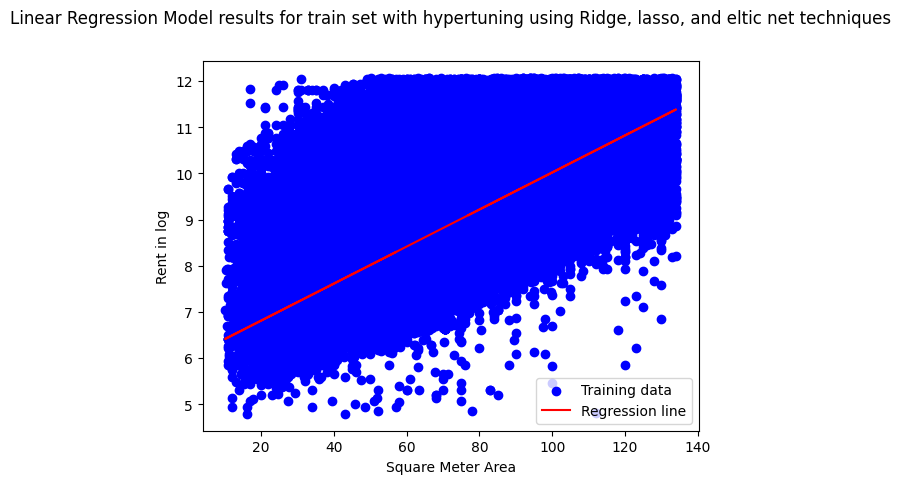

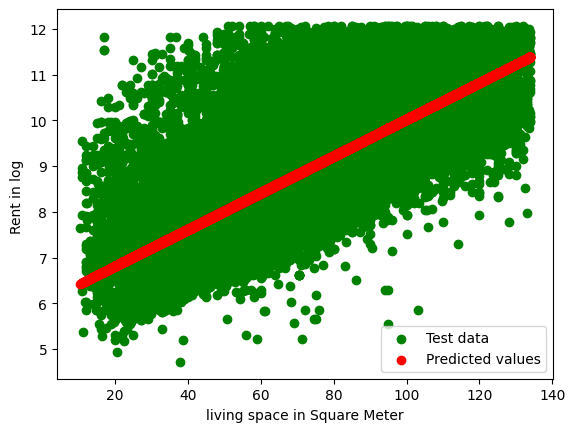

In [40]:
best_model= grid_search.best_estimator_
# Predict on the test set.
y_pred_cbrt = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_cbrt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cbrt))
r2 = r2_score(y_test, y_pred_cbrt)
print(f'Mean Absolute Error for log predction (MAE): {mae}')
print(f'Root Mean Squared Error  log predction (RMSE): {rmse}')
print(f'R-squared: {r2}')
#ploting the graph between feature and target set between actual train target data and predicted  train target data 
y_train_pred=best_model.predict(X_train)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='red', label='Regression line')
plt.title('Linear Regression Model results for train set with hypertuning using Ridge, lasso, and eltic net techniques', y=1.08)
plt.xlabel('Square Meter Area')
plt.ylabel('Rent in log')
plt.legend()
plt.show()
#ploting the graph between feature and target set between actual test target data and predicted test target data 
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.scatter(X_test, y_pred_cbrt, color='red', label='Predicted values')
plt.xlabel('living space in Square Meter')
plt.ylabel('Rent in log ')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 180.9470444518715
Root Mean Squared Error (RMSE): 245.08978488513125
R-squared: 0.45694356567932015


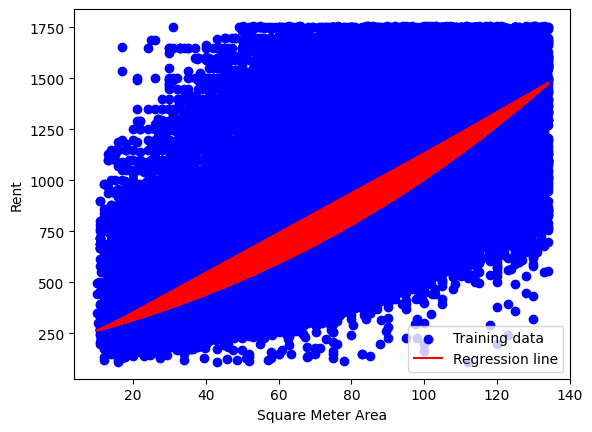

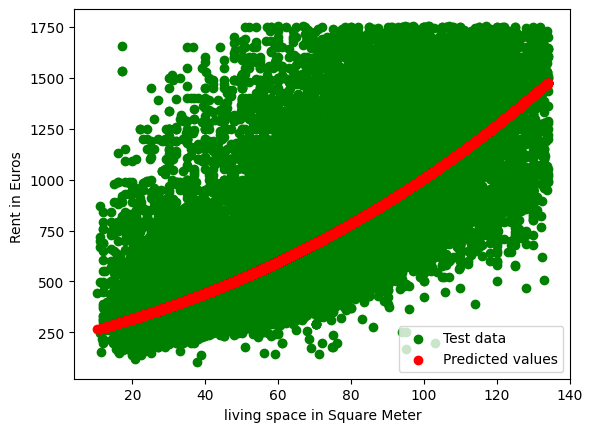

In [41]:
# Getting results orignal units(Euro)
y_pred_cube=np.power(y_pred_cbrt, 3)
y_train_pred_cube= np.power(y_train_pred,3)
y_train_cube=np.power(y_train,3)
y_test_cube=np.power(y_test,3)
mae = mean_absolute_error(y_test_cube, y_pred_cube)
rmse = np.sqrt(mean_squared_error(y_test_cube, y_pred_cube))
r2 = r2_score(y_test_cube, y_pred_cube)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')
#ploting the graph between feature and target set between actual train target data and predicted  train target data 
plt.scatter(X_train, y_train_cube, color='blue', label='Training data')
plt.plot(X_train, y_train_pred_cube, color='red', label='Regression line')
plt.xlabel('Square Meter Area')
plt.ylabel('Rent')
plt.legend()
plt.show()
#ploting the graph between feature and target set between actual test target data and predicted test target data 
plt.scatter(X_test, y_test_cube, color='green', label='Test data')
plt.scatter(X_test, y_pred_cube, color='red', label='Predicted values')
plt.xlabel('living space in Square Meter')
plt.ylabel('Rent in Euros ')
plt.legend()
plt.show()

In [42]:
# funtion that gives a dictionary with the results of all the models individually.

def predict_price(livingSpace):
    models = {
        'model_log': model_log,
        'model_cbrt': model_cbrt,
        'model_original': model_orignal,
        'best_model': best_model
    }
    
    predictions = {}

    for model_name, model in models.items():
        livingSpace_reshaped = np.array(livingSpace).reshape(1, -1)
        
        if model_name == 'model_log':
            Rent = model.predict(livingSpace_reshaped)[0]
            Rent = np.exp(Rent)  
    
        
        elif model_name == 'model_orignal':  
            Rent = model.predict(livingSpace_reshaped)[0]
        else: 
            Rent = model.predict(livingSpace_reshaped)[0]
            Rent = Rent ** 3  
        
        predictions[model_name] = Rent

    return predictions


living_space_example = 30
print('Rent according to Orignal Data is', predict_price(living_space_example)['model_original'])
print('Rent according to Log of Orignal Data is', predict_price(living_space_example)['model_log'])
print('Rent according to model cube root transformed data  Data is', predict_price(living_space_example)['model_cbrt'])
print('Rent according to hypertuned model  is', predict_price(living_space_example)['best_model'])

Rent according to Orignal Data is 751654191.7735023
Rent according to Log of Orignal Data is 23007889142243.453
Rent according to model cube root transformed data  Data is 375.30696462042874
Rent according to hypertuned model  is 375.3069912806298


## So Model predicted 375 Euros for 30sq meter property.

### 

## Limitation and future aspects

### Model still shows that there is a gap of 70 euros between the Root mean square error and the Mean absolute error.
### This is because outliers in rent per square meter area are still an issue. Some ads would be outliers as they would seek the exceptionally high or low value of rent per meter square area to make our RMSE value high.
### To fix we can limit the highest and lowest rent-to-area ratio for our data set.
### After comparing these predictions results to chat Chatgpt, which predicted the rent of a 30-meter square area property as 300 euros, it was clear that rent per square meter outliers are causing overestimation.
### If we look at the graph between rent and area predicted of test and train set we can see that values with higher rent to area ratio are more dispersed as values below the are more concentrated. which causes or model to overestimate then Chatgpt.

## Issue can be resolved using reports published by other sources such as news reports which report average rent per square meter. Which are always dependent on location. So adding different features will bring better results but that could be the scope of another project.